# Lab 4 Plotting

### Data visualization is as much a part of the data processing step as the data presentation step. It is much easier to compare values when they are plotted than numeric values. By visualizing data we are able to get a better intuitive sense of the data than would be possible by looking at tables of values alone. Additionally, visualizations can bring to light hidden patterns in data, that you, the analyst, can exploit for model selection.

## This session will cover:
1. matplotlib
2. seaborn
3. Plotting in Pandas

#### Seaborn is a useful library to plot and visualize datasets. Reference:
https://seaborn.pydata.org/tutorial.html

### 4.1. Let's load and install some libraries

In [13]:
import pandas as pd

In [14]:
import matplotlib.pyplot as plt


In [15]:
import seaborn as sns

### 4.2. Let's load some data

In [16]:
# tips is a dataset included in the seaborn library
tips = sns.load_dataset("tips")

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 4.3 Let's do some plotting (univariate, bivariate)

#### 4.3.1 Histograms

In [18]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


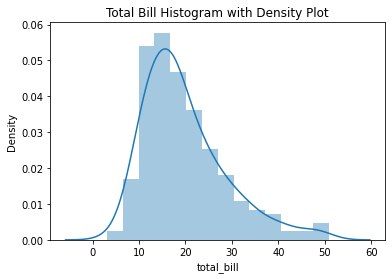

In [19]:
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot');

#### The histogram reveals that 20 dollars is the usual total_bill (mean 19.78)

#### 4.3.2 Bar Plots

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


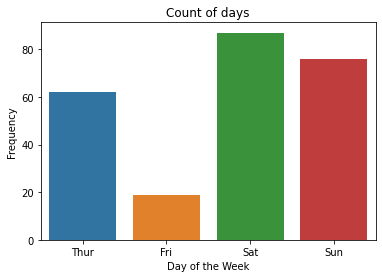

In [20]:
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days');
ax.set_xlabel('Day of the Week');
ax.set_ylabel('Frequency');

#### we observe from the previous figure that people tend to dine outside mostly on weekends

#### 4.3.3 ScatterPlot

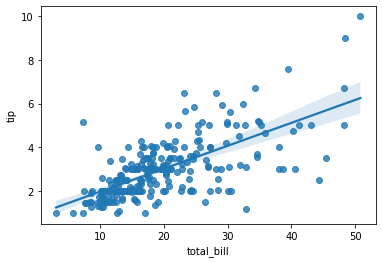

In [21]:
x = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip');
ax.set_xlabel('Total Bill');
ax.set_ylabel('Tip');

#### we observe some relationship between the total amount paid and the tip received, but also increasing variability

#### 4.3.4 Density Plot

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


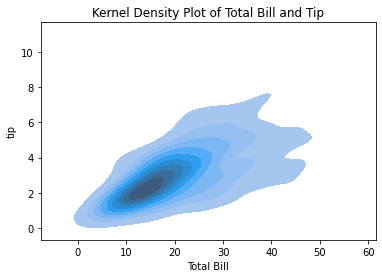

In [22]:
ax = sns.kdeplot(data=tips['total_bill'],data2=tips['tip'],shade=True) # shade will fill in the contours
ax.set_title('Kernel Density Plot of Total Bill and Tip');
ax.set_xlabel('Total Bill');

#### 4.3.5 Box Plot

Text(0, 0.5, 'Total Bill')

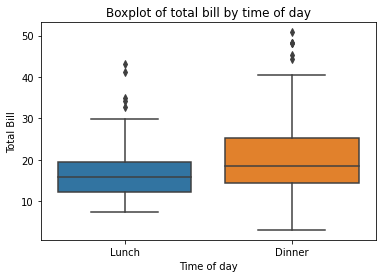

In [23]:
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### dinners seem to be more profitable

#### 4.3.6 Violin Plot

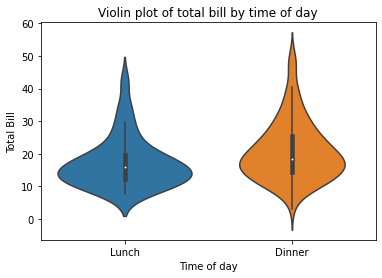

In [24]:
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day');
ax.set_xlabel('Time of day');
ax.set_ylabel('Total Bill');

#### 4.3.7 Pair Plot

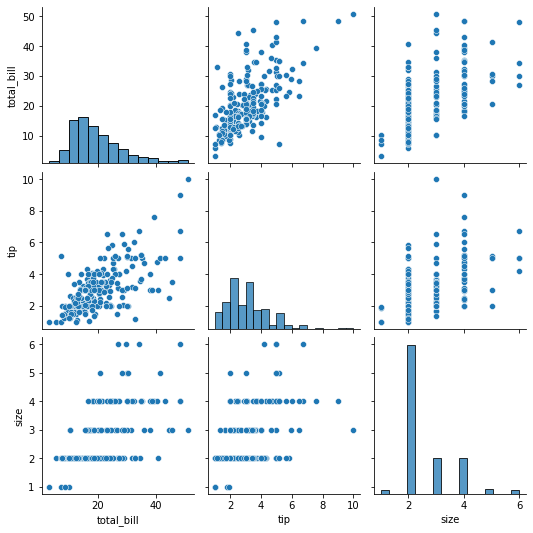

In [25]:
fig = sns.pairplot(tips)

#### 4.3.7 Pair Plot (fancy)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

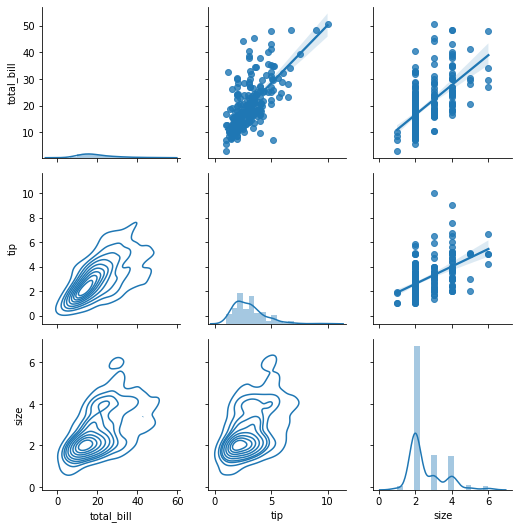

In [26]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=False)
plt.show()

### 4.4 Multivariate plotting

#### multivariate plotting is hard and there is no best practice on how to do it, it really depends on the purpose of the visualization

#### 4.4.1 Violin Plots

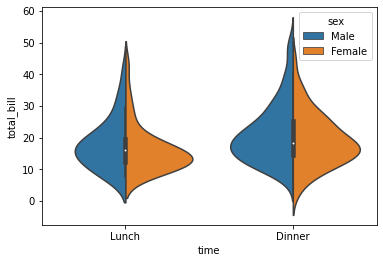

In [27]:
ax = sns.violinplot(x='time', y='total_bill',hue='sex', data=tips,split=True)

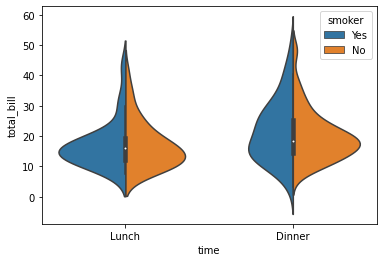

In [28]:
ax = sns.violinplot(x='time', y='total_bill',hue='smoker', data=tips,split=True)

#### 4.4.2 Pair Plots

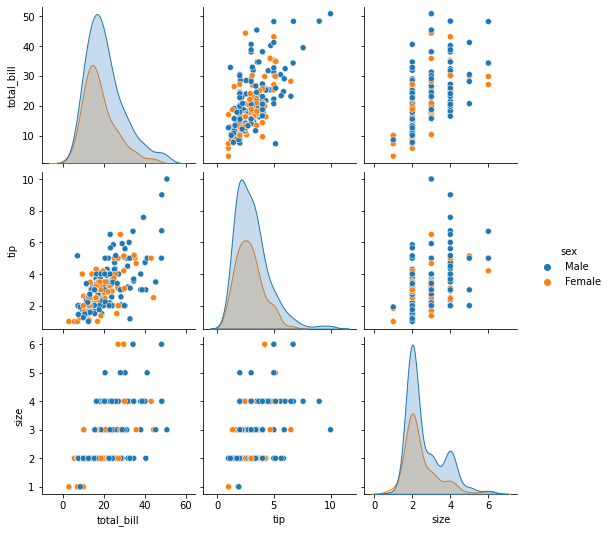

In [29]:
fig = sns.pairplot(tips, hue='sex')

#### 4.4.3 Facet Plots

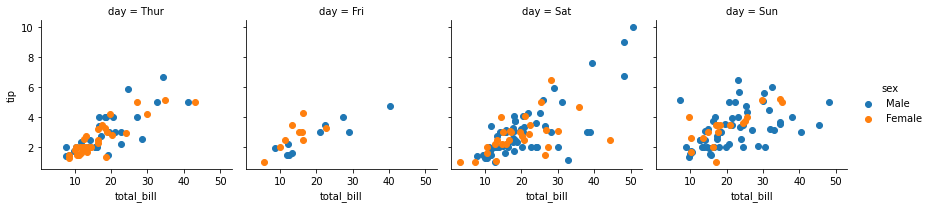

In [30]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()


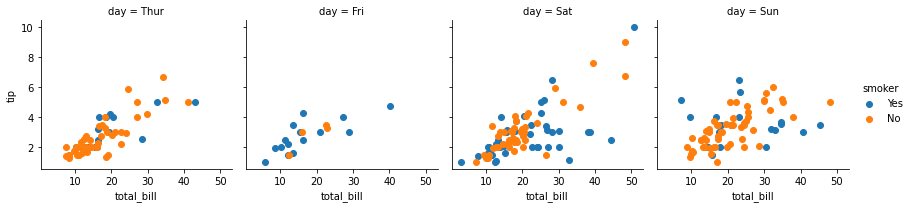

In [31]:
facet = sns.FacetGrid(tips, col='day', hue='smoker')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

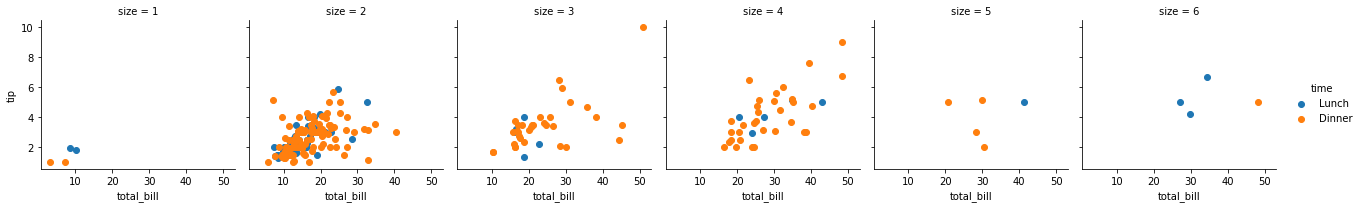

In [32]:
facet = sns.FacetGrid(tips, col='size', hue='time')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

# Further References:

#### Chapter 3 from the reference book: Pandas for Everyone. Available online at Exeter Library

#### Seaborn tutorial. https://seaborn.pydata.org/tutorial.html#